In [ ]:
#Sebastián Celedón y Thiare Guerrero
#Analitica descriptiva

# <span style="color:green;">**1. Scraping novedades en Steam**</span>

## **1.1 Importación de librerías y configuración inicial**: En esta sección, se importan las librerías necesarias para el web scraping y análisis de datos. También se establece la URL base de la tienda de Steam.

---



In [ ]:
#Librerías necesarias:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests
import re
import pandas as pd
import seaborn as sns
import plotly.express as px
import time
import numpy as np
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
!pip install --upgrade matplotlib seaborn
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


## **1.2 Extracción de enlaces**:
Se realiza un análisis de la página principal de Steam para extraer enlaces. Se usa BeautifulSoup para analizar el contenido HTML y re para extraer los enlaces con expresiones regulares.

In [ ]:
#Definimos la URL base
url_base = "https://store.steampowered.com/"

#Hacemos una solicitud GET a la URL base
response = requests.get(url_base)

#Imprimimos el código de estado de la respuesta
print("Código de estado:", response.status_code)

#Imprimimos los primeros 1000 caracteres del contenido HTML
print("Contenido HTML (primeros 500 caracteres):")
print(response.text[:50000])


Código de estado: 200
Contenido HTML (primeros 500 caracteres):
<!DOCTYPE html>
<html class=" responsive" lang="en">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
			<meta name="viewport" content="width=device-width,initial-scale=1">
		<meta name="theme-color" content="#171a21">
		<title>Welcome to Steam</title>
	<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">

	
	
	<link href="https://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=Rc2hpzg2Ex3T&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=cNFo_SNYcn7k&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=CrrkDubPqLcq&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/css/v6/store.css?v=Rzrd3uCdRpEQ&amp;l=english" rel="stylesheet" type="text/css" >
<l

In [ ]:
# Realiza la solicitud al URL base
respuesta_articulo = requests.get(url_base)

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "button_container"
contenido = sopa_articulo.find_all("div", {"class": "button_container"})

# Imprime el contenido extraído
print(contenido)

# URL base para las novedades
url_base = "https://store.steampowered.com/explore/new/"

[<div class="button_container" data-panel='{"flow-children":"row"}'>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/explore/new/?snr=1_4_4__146">
                    New Releases                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/search/?specials=1&amp;snr=1_4_4__146">
                    Specials                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/genre/Free to Play/?snr=1_4_4__146">
                    Free Games                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/tag/browse/?snr=1_4_4__146">
                    By User Tags                </a>
</div>]


In [ ]:
x = re.findall('https[\S ]+6',str(contenido)) # obtenemos los links de interés.
print(x)

['https://store.steampowered.com/explore/new/?snr=1_4_4__146', 'https://store.steampowered.com/search/?specials=1&amp;snr=1_4_4__146', 'https://store.steampowered.com/genre/Free to Play/?snr=1_4_4__146', 'https://store.steampowered.com/tag/browse/?snr=1_4_4__146']


In [ ]:
# Define la función para obtener el enlace deseado
def links(index):
    try:
        return x[index]
    except IndexError:
        return "Índice fuera de rango"

# Obtén el enlace de novedades
print(links(0))

https://store.steampowered.com/explore/new/?snr=1_4_4__146


In [ ]:
# Obtén el request del link de novedades
respuesta_articulo = requests.get(links(0))

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "tab_see_more"
contenido2 = sopa_articulo.find_all("div", {"class": "tab_see_more"})

# Convierte el contenido a una cadena de texto
contenido2_texto = ' '.join([str(elemento) for elemento in contenido2])
# Encuentra los enlaces usando expresiones regulares
x2 = re.findall(r'https://store\.steampowered\.com[^\s"]*pop[^\s"]*n', contenido2_texto)

# Imprime los enlaces encontrados
print(x2)

['https://store.steampowered.com/search/?filter=popularnew&amp;sort_by=Released_DESC&amp;os=win']


In [ ]:
# Realiza la solicitud al URL base
respuesta_articulo = requests.get(url_base)

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "button_container"
contenido = sopa_articulo.find_all("div", {"class": "button_container"})

# Imprime el contenido extraído
print(contenido)


[]


## **1.3 Definicion de funciones:**
Funciones para la extraccion de los datos necesarios a trabajar


In [ ]:
def formatear_plataformas(plataformas):
    plataforma_mapeo = {
        "win": "Windows",
        "mac": "Mac",
        "linux": "Linux"
    }
    return [plataforma_mapeo.get(plataforma, plataforma.capitalize()) for plataforma in plataformas]

def traducir_categoria(categoria):
    traducciones = {
        "Very Positive": "Muy Positivo",
        "Mostly Positive": "Mayormente Positivo",
        "Mixed": "Mixto",
        "Mostly Negative": "Mayormente Negativo",
        "Very Negative": "Muy Negativo",
        "Overwhelmingly Positive": "Absolutamente Positivo",
        "Overwhelmingly Negative": "Absolutamente Negativo",
        "Positive": "Positivo",
        "Negative": "Negativo"
    }
    return traducciones.get(categoria, "Sin categoría")

In [ ]:
def extraer_info_juego(url_juego):
    try:
        respuesta_juego = requests.get(url_juego)
        sopa_juego = BeautifulSoup(respuesta_juego.text, 'lxml')

        valoracion_total = sopa_juego.find('span', class_='game_review_summary').text.strip() if sopa_juego.find('span', class_='game_review_summary') else "Sin valoracion"
        resenas_summary = sopa_juego.find_all('div', class_='user_reviews_summary_row')

        total_resenas = 0
        porcentaje_positividad = 0
        categoria_resenas = ""

        for resena in resenas_summary:
            texto_resena = resena.text.strip()
            if "All Reviews" in texto_resena:
                total_resenas_match = re.search(r'\(([\d,]+)\)', texto_resena)
                porcentaje_match = re.search(r'(\d+)%', texto_resena)

                if total_resenas_match:
                    total_resenas = int(total_resenas_match.group(1).replace(',', ''))

                if porcentaje_match:
                    porcentaje_positividad = int(porcentaje_match.group(1))

                categoria_resenas = valoracion_total.split()[0] + " " + valoracion_total.split()[1] if len(valoracion_total.split()) > 1 else valoracion_total
                categoria_resenas = traducir_categoria(categoria_resenas)
                break

        contenido_generos = sopa_juego.find("span", {"data-panel": True})
        if contenido_generos:
            generos = [genero.text.strip() for genero in contenido_generos.find_all("a")]
        else:
            generos = ["Generos no encontrados"]

        return {
            "Valoracion Total": valoracion_total,
            "Total de Resenas": total_resenas,
            "Porcentaje de Positividad": porcentaje_positividad,
            "Categoria de Resenas": categoria_resenas,
            "Generos": generos
        }
    except Exception as e:
        print(f"Error al extraer informacion del juego: {e}")
        return {
            "Valoracion Total": "Error",
            "Total de Resenas": 0,
            "Porcentaje de Positividad": 0,
            "Categoria de Resenas": "Error al extraer",
            "Generos": ["Error al extraer"]
        }

def extraer_juegos(cantidad):
    juegos = []
    pagina = 1

    while len(juegos) < cantidad:
        try:
            url_paginada = f"https://store.steampowered.com/search/?page={pagina}&cc=us"
            respuesta_articulo = requests.get(url_paginada)
            sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
            contenido = sopa_articulo.find_all("a", {"class": "search_result_row"})

            if not contenido:
                break

            for juego in contenido:
                nombre = juego.find("span", {"class": "title"}).text.strip()
                precio = juego.find("div", {"class": "discount_final_price"})
                precio = precio.text.strip() if precio else "Gratis" if "free" in juego.get("class", []) else "Sin precio"
                fecha_lanzamiento = juego.find("div", {"class": "col search_released responsive_secondrow"}).text.strip() if juego.find("div", {"class": "col search_released responsive_secondrow"}) else "Sin fecha"
                plataformas = [img['class'][1] for img in juego.find_all("span", {"class": "platform_img"})]
                plataformas_formateadas = formatear_plataformas(plataformas)

                link_juego = juego["href"]
                info_juego = extraer_info_juego(link_juego)

                juegos.append({
                    "Nombre": nombre,
                    "Precio": precio,
                    "Fecha de Lanzamiento": fecha_lanzamiento,
                    "Plataformas": plataformas_formateadas,
                    "Total de Reseñas": info_juego["Total de Resenas"],
                    "Porcentaje de Positividad": info_juego["Porcentaje de Positividad"],
                    "Categoria de Reseñas": info_juego["Categoria de Resenas"],
                    "Generos": ", ".join(info_juego["Generos"])
                })

                if len(juegos) >= cantidad:
                    break

            pagina += 1
            time.sleep(1)
        except Exception as e:
            print(f"Error al procesar la pagina {pagina}: {e}")
            break

    print(f"Cantidad total de juegos extraidos: {len(juegos)}")
    return juegos


## **1.4 Extraccion de datos:**
Se llaman las funciones anteriores y se guarda la informacion en un "csv" cuyo nombre se define como "resultados_juegos_completos.csv"

In [ ]:
# Cantidad de juegos a extraer
juegos_extraidos = extraer_juegos(1000)

# Creacion del dataFrame
df_juegos = pd.DataFrame(juegos_extraidos)

Cantidad total de juegos extraidos: 1000


In [ ]:
# Aplica transformaciones finales en el dataFrame
df_juegos['Generos'] = df_juegos['Generos'].str.replace(', ', ',')  # Eliminar espacios después de la coma si es necesario

# Guardar el dataFrame en un CSV
df_juegos.to_csv('resultados_juegos_completos.csv', index=False, sep=';', encoding='utf-8-sig')
print("Extracción completa. Los resultados se han guardado en 'resultados_juegos_completos.csv'.")

Extracción completa. Los resultados se han guardado en 'resultados_juegos_completos.csv'.


In [ ]:
df_juegos.head()

,Nombre,Precio,Fecha de Lanzamiento,Plataformas,Total de Reseñas,Porcentaje de Positividad,Categoria de Reseñas,Generos
0,Counter-Strike 2,Free,"Aug 21, 2012","[Windows, Linux]",8336332,87,Mayormente Positivo,"Action,Free To Play"
1,"Warhammer 40,000: Space Marine 2",$59.99,"Sep 9, 2024",[Windows],73457,81,Muy Positivo,"Action,Adventure,RPG"
2,TCG Card Shop Simulator,$12.99,"Sep 15, 2024",[Windows],8952,96,Absolutamente Positivo,"Simulation,Early Access"
3,Warframe,Free,"Mar 25, 2013",[Windows],593451,87,Muy Positivo,"Action,RPG,Free To Play"
4,SILENT HILL 2,$69.99,"Oct 7, 2024",[Windows],1607,95,Absolutamente Positivo,"Action,Adventure"


# **2. Manipulacion de los datos extraidos**

## **2.1 Limpieza de datos:**
Tras la correcta obtencion de los datos, se procede a su visualizacion y posterior limpieza, lo que sería como la eliminación de signos ($), espacios vacios, etc.


limpieza de precios y nombres repetidos

In [ ]:
# Función para limpiar y convertir los precios en formato float
def limpiar_precios(precio):
    if precio == "Free":
        return 0.00  # Cambiar "Free" a 0.00 en formato float
    elif precio == "Sin precio":
        return None  # Mantener como None para manejarlo después
    else:
        # Remover el símbolo de dólar y las comas, luego convertir a float
        return float(precio.replace('$', '').replace(',', ''))

# Aplicar la función de limpieza a la columna 'Precio'
df_juegos['Precio'] = df_juegos['Precio'].apply(limpiar_precios)

# Asignar 0.00 a los precios que son None o NaN
df_juegos['Precio'] = df_juegos['Precio'].fillna(0.00)

# Eliminar duplicados basados en la columna 'Nombre'
df_juegos = df_juegos.drop_duplicates(subset='Nombre', keep='first')

# Mostrar las primeras 10 filas para verificar
df_juegos.head(10)

,Nombre,Precio,Fecha de Lanzamiento,Plataformas,Total de Reseñas,Porcentaje de Positividad,Categoria de Reseñas,Generos
0,Counter-Strike 2,0.00,"Aug 21, 2012","[Windows, Linux]",8336332,87,Mayormente Positivo,"Action,Free To Play"
1,"Warhammer 40,000: Space Marine 2",59.99,"Sep 9, 2024",[Windows],73457,81,Muy Positivo,"Action,Adventure,RPG"
2,TCG Card Shop Simulator,12.99,"Sep 15, 2024",[Windows],8952,96,Absolutamente Positivo,"Simulation,Early Access"
3,Warframe,0.00,"Mar 25, 2013",[Windows],593451,87,Muy Positivo,"Action,RPG,Free To Play"
4,SILENT HILL 2,69.99,"Oct 7, 2024",[Windows],1607,95,Absolutamente Positivo,"Action,Adventure"
5,THRONE AND LIBERTY,0.00,"Oct 1, 2024",[Windows],24356,63,Mixto,"Action,Adventure,Massively Multiplayer,RPG,Fre..."
6,Baldur's Gate 3,59.99,"Aug 3, 2023","[Windows, Mac]",586336,96,Absolutamente Positivo,"Adventure,RPG,Strategy"
7,Black Myth: Wukong,59.99,"Aug 19, 2024",[Windows],691528,96,Absolutamente Positivo,"Action,Adventure,RPG"
8,Rust,23.99,"Feb 8, 2018","[Windows, Mac]",917269,87,Muy Positivo,"Action,Adventure,Indie,Massively Multiplayer,RPG"
9,Satisfactory,39.99,"Sep 10, 2024",[Windows],159492,96,Muy Positivo,"Adventure,Indie,Simulation,Strategy"


eliminacion de valores nulos

In [ ]:
# Almacena los nombres de los juegos que serán eliminados
nombres_eliminados = df_juegos[df_juegos.isnull().any(axis=1) | df_juegos.eq('').any(axis=1)]['Nombre'].tolist()

# Elimina las filas que contienen valores vacíos en alguna columna
df_juegos_limpio = df_juegos.dropna().replace('', pd.NA).dropna()

# Imprime los nombres de los juegos eliminados
print("Juegos eliminados:")
for nombre in nombres_eliminados:
    print(nombre)


Juegos eliminados:
Steam Deck
Steam Deck Docking Station
Warhammer 40,000: Rogue Trader - Voidfarer Edition
DARK SOULS III Deluxe Edition
Grand Theft Auto V: Premium Edition & Great White Shark Card Bundle
Grand Theft Auto IV: Complete Edition
Crusader Kings III: Chapter III
Dead Cells: Medley of Pain Bundle
The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe
Borderlands Collection: Pandora's Box
OCTOPATH TRAVELER + OCTOPATH TRAVELER II
Cult of the Lamb Soundtrack
Cyberpunk 2077: Ultimate Edition
God of War Ragnarök Digital Deluxe Edition
Metro Saga Bundle
Monster Hunter World: Iceborne Master Edition
Ready or Not: Home Invasion Bundle


In [ ]:
# Almacena los nombres de los juegos que serán eliminados por tener Total de Reseñas igual a 0
nombres_eliminados_resenas = df_juegos_limpio[df_juegos_limpio['Total de Reseñas'] == 0]['Nombre'].tolist()

# Elimina las filas que tienen valor 0 en la columna "Total de Reseñas"
df_juegos_limpio = df_juegos_limpio[df_juegos_limpio['Total de Reseñas'] != 0]

# Imprime los nombres de los juegos eliminados
print("Juegos eliminados por tener Total de Reseñas igual a 0:")
for nombre in nombres_eliminados_resenas:
    print(nombre)

Juegos eliminados por tener Total de Reseñas igual a 0:
DRAGON BALL: Sparking! ZERO
Metaphor: ReFantazio
Call of Duty®: Black Ops 6
Monster Hunter Wilds
Dragon Age™: The Veilguard
Valve Index® Headset
Microsoft Flight Simulator 2024
SONIC X SHADOW GENERATIONS
Sid Meier's Civilization VII
Farming Simulator 25
Valve Index® Controllers
Planet Coaster 2
S.T.A.L.K.E.R. 2: Heart of Chornobyl
Kingdom Come: Deliverance II
Valve Index® Base Station
Life is Strange: Double Exposure
Call of Duty®: Modern Warfare® III - Tracer Pack: Nuptial Nightmare Ultra Skin Pro Pack


In [ ]:
df_juegos_limpio.shape

(966, 8)

Ya con una limpieza general procedemos a limpiar columna por columna valores que entorpezcan la visualizacion

In [ ]:
# Mostrar el nombre de las columnas
print(df_juegos_limpio.columns)
print(df_juegos_limpio.dtypes)

Index(['Nombre', 'Precio', 'Fecha de Lanzamiento', 'Plataformas',
       'Total de Reseñas', 'Porcentaje de Positividad', 'Categoria de Reseñas',
       'Generos'],
      dtype='object')
Nombre                        object
Precio                       float64
Fecha de Lanzamiento          object
Plataformas                   object
Total de Reseñas               int64
Porcentaje de Positividad      int64
Categoria de Reseñas          object
Generos                       object
dtype: object


limpieza de reseñas

In [ ]:
# Crear un nuevo df con las reseñas ordenas
df_juegos_resenas = df_juegos_limpio[['Nombre', 'Total de Reseñas']]

# Ordenar el DataFrame de mayor a menor según "Total de Reseñas"
df_juegos_resenas = df_juegos_resenas.sort_values(by='Total de Reseñas', ascending=False)

# Reiniciar el índice si es necesario
df_juegos_resenas.reset_index(drop=True, inplace=True)

# Mostrar el nuevo DataFrame
print(df_juegos_resenas)

                                                Nombre  Total de Reseñas
0                                     Counter-Strike 2           8336332
1                                  PUBG: BATTLEGROUNDS           2438733
2                                               Dota 2           2332080
3                                   Grand Theft Auto V           1721605
4                      Tom Clancy's Rainbow Six® Siege           1124733
..                                                 ...               ...
961                            DUCKSIDE Supporter pack                28
962  God of War Ragnarök - Digital Deluxe Edition U...                27
963                      THE FINALS - Hedge Hunter Set                19
964                    Warframe: Koumei Visions Bundle                18
965  Call of Duty®: Modern Warfare® III - Tracer Pa...                15

[966 rows x 2 columns]


In [ ]:
# Asignar el nuevo valor de reseñas a "Counter-Strike 2"
df_juegos_limpio.loc[df_juegos_limpio['Nombre'] == 'Counter-Strike 2', 'Total de Reseñas'] = 2436198
# Verificar el cambio
print(df_juegos_limpio[df_juegos_limpio['Nombre'] == 'Counter-Strike 2'])

             Nombre  Precio Fecha de Lanzamiento       Plataformas  \
0  Counter-Strike 2     0.0         Aug 21, 2012  [Windows, Linux]   

   Total de Reseñas  Porcentaje de Positividad Categoria de Reseñas  \
0           2436198                         87  Mayormente Positivo   

               Generos  
0  Action,Free To Play  


Se visualiza la cantidad de juegos que posee cada género, con la finalidad de encontrar valores atípicos.

In [ ]:
todos_los_generos = df_juegos_limpio['Generos'].str.split(',').explode().str.strip()

# Contar la cantidad de cada género
conteo_generos = todos_los_generos.value_counts()

# Mostrar la cantidad de géneros y sus conteos
print("Conteo de Géneros:")
print(conteo_generos)

# Mostrar los géneros únicos
generos_unicos = todos_los_generos.unique()
print("\nGéneros únicos:")
print(generos_unicos)

Conteo de Géneros:
Generos
Action                   542
Adventure                400
Indie                    368
RPG                      320
Simulation               301
Strategy                 243
Casual                   150
Early Access             118
Free To Play             100
Massively Multiplayer     97
Sports                    39
Racing                    34
Design & Illustration      5
Animation & Modeling       4
Game Development           4
Utilities                  3
Photo Editing              2
Education                  2
Web Publishing             1
Name: count, dtype: int64

Géneros únicos:
['Action' 'Free To Play' 'Adventure' 'RPG' 'Simulation' 'Early Access'
 'Massively Multiplayer' 'Strategy' 'Indie' 'Sports' 'Casual' 'Racing'
 'Animation & Modeling' 'Design & Illustration' 'Photo Editing'
 'Utilities' 'Education' 'Game Development' 'Web Publishing']


Como se logra apreciar, 7 géneros poseen menos de 6 juegos. Se opta por su eliminación.

In [ ]:
# Lista de géneros a eliminar
generos_a_eliminar = [
    'Animation & Modeling',
    'Design & Illustration',
    'Photo Editing',
    'Utilities',
    'Education',
    'Web Publishing',
    'Game Development'
]

# Normaliza la columna 'Generos' eliminando espacios y convirtiendo a minúsculas
df_juegos_limpio['Generos'] = df_juegos_limpio['Generos'].str.strip()

# Almacena los nombres de los juegos que serán eliminados
nombres_eliminados_generos = df_juegos_limpio[
    df_juegos_limpio['Generos'].str.contains('|'.join(generos_a_eliminar), na=False)
]['Nombre'].tolist()

# Elimina las filas que contienen los géneros especificados
df_juegos_limpio = df_juegos_limpio[
    ~df_juegos_limpio['Generos'].str.contains('|'.join(generos_a_eliminar), na=False)
]

# Imprime los nombres de los juegos eliminados
print("Juegos eliminados por tener géneros no deseados:")
for nombre in nombres_eliminados_generos:
    print(nombre)

Juegos eliminados por tener géneros no deseados:
Wallpaper Engine
Lossless Scaling
Crosshair X
Aseprite
RPG Maker MZ
Substance 3D Painter 2024


In [ ]:
todos_los_generos = df_juegos_limpio['Generos'].str.split(',').explode().str.strip()

# Contar la cantidad de cada género
conteo_generos = todos_los_generos.value_counts()

# Mostrar la cantidad de géneros y sus conteos
print("Conteo de Géneros:")
print(conteo_generos)

# Mostrar los géneros únicos
generos_unicos = todos_los_generos.unique()
print("\nGéneros únicos:")
print(generos_unicos)

Conteo de Géneros:
Generos
Action                   541
Adventure                399
Indie                    366
RPG                      319
Simulation               301
Strategy                 243
Casual                   149
Early Access             118
Free To Play             100
Massively Multiplayer     97
Sports                    39
Racing                    34
Name: count, dtype: int64

Géneros únicos:
['Action' 'Free To Play' 'Adventure' 'RPG' 'Simulation' 'Early Access'
 'Massively Multiplayer' 'Strategy' 'Indie' 'Sports' 'Casual' 'Racing']


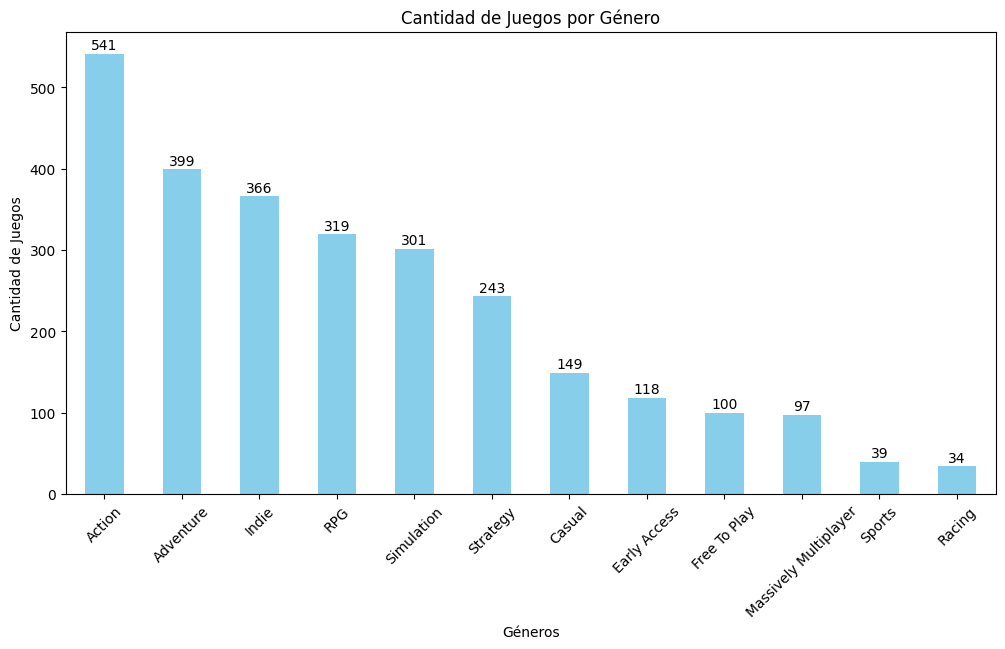

In [ ]:
top_generos = conteo_generos
# Gráfico de barras para visualizar la cantidad de juegos por género
plt.figure(figsize=(12, 6))
top_generos.plot(kind='bar', color='skyblue')

# Agregar título y etiquetas
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)

# Agregar los valores en la parte superior de cada barra
for i, valor in enumerate(top_generos):
    plt.text(i, valor + 2, str(valor), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

In [ ]:
df_juegos_limpio.shape

(960, 8)

In [ ]:
# Guardar el DataFrame filtrado en un nuevo CSV
df_juegos_limpio.to_csv('df_juegos_limpio.csv', index=False, sep=';', encoding='utf-8-sig')

## **2.2 Visualización y Analisis de datos**


In [ ]:
# Cargar el CSV
df_juegos_limpio = pd.read_csv('/content/df_juegos_limpio.csv', sep=';')

### 2.2.1 Generos


In [ ]:
# Lista de géneros deseados
generos_deseados = [
    'Action', 'Free To Play', 'Adventure', 'RPG',
    'Massively Multiplayer', 'Simulation', 'Early Access',
    'Strategy', 'Sports', 'Indie', 'Casual', 'Racing'
]

# Crea un DataFrame inicial con los nombres de los juegos
df_generos = pd.DataFrame(df_juegos_limpio['Nombre'])

# Añade columnas para cada género en la lista de géneros deseados
for genero in generos_deseados:
    df_generos[genero] = df_juegos_limpio['Generos'].str.contains(genero, na=False).astype(int)
# Imprime el nuevo DataFrame
df_generos.head()

,Nombre,Action,Free To Play,Adventure,RPG,Massively Multiplayer,Simulation,Early Access,Strategy,Sports,Indie,Casual,Racing
0,Counter-Strike 2,1,1,0,0,0,0,0,0,0,0,0,0
1,"Warhammer 40,000: Space Marine 2",1,0,1,1,0,0,0,0,0,0,0,0
2,THRONE AND LIBERTY,1,1,1,1,1,0,0,0,0,0,0,0
3,TCG Card Shop Simulator,0,0,0,0,0,1,1,0,0,0,0,0
4,Dota 2,1,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Guardar el DataFrame generos en un nuevo CSV
df_generos.to_csv('df_generos.csv', index=False, sep=';', encoding='utf-8-sig')

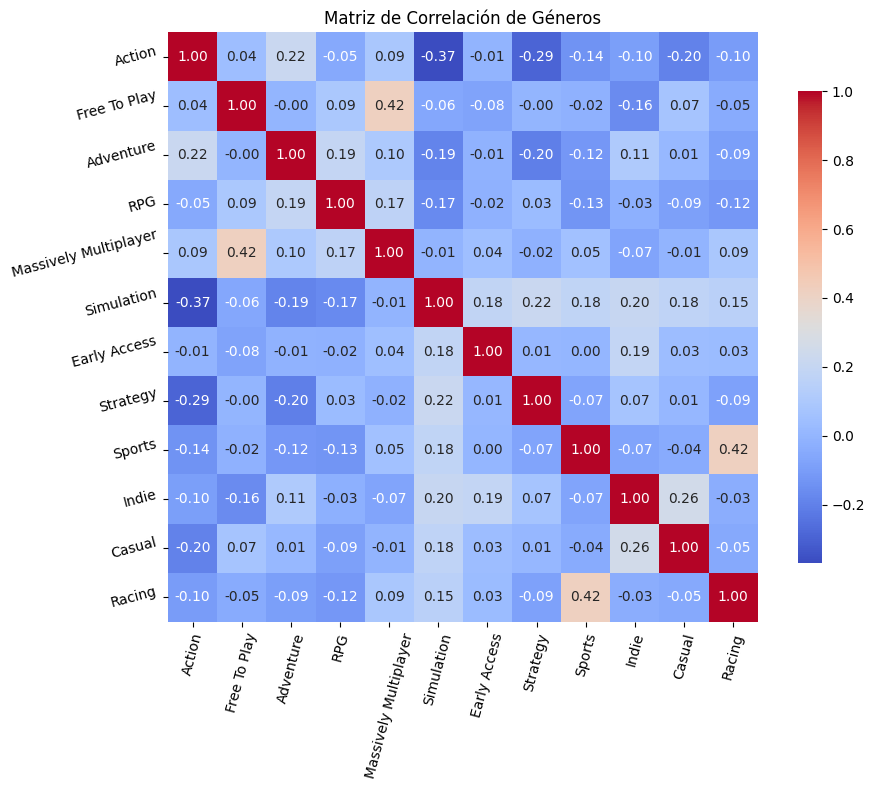

In [ ]:
# Selecciona solo las columnas de géneros para la matriz de correlación
generos_numericos = df_generos.drop(columns=['Nombre'])

# Calcula la matriz de correlación
matriz_correlacion = generos_numericos.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea un mapa de calor para visualizar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añade títulos y etiquetas
plt.title('Matriz de Correlación de Géneros')
plt.xticks(rotation=75)
plt.yticks(rotation=15)
plt.tight_layout()

# Muestra el mapa de calor
plt.show()

### 2.2.2 Reseñas v/s % de Positividad

In [ ]:
df_positividad = df_juegos_limpio[['Nombre', 'Porcentaje de Positividad', 'Total de Reseñas']].copy()

#Ordenamos el DataFrame de mayor a menor positividad
df_positividad = df_positividad.sort_values(by='Porcentaje de Positividad', ascending=False)

df_positividad.head(20)

,Nombre,Porcentaje de Positividad,Total de Reseñas
685,Warframe: Koumei Visions Bundle,100,18
729,Grunn,100,82
181,Echo Point Nova,99,1439
702,I Am Your Beast,99,1062
510,VTOL VR,98,15850
625,Bomb Rush Cyberfunk,98,10366
341,Half-Life: Alyx,98,80118
118,Fields of Mistria,98,8976
842,OneShot,98,42950
100,Tactical Breach Wizards,98,5431


In [ ]:
df_positividad.shape

(960, 3)

In [ ]:
estadisticas_positividad = df_positividad['Porcentaje de Positividad'].describe()

# Imprimir los resultados con etiquetas personalizadas
print(f"Número de Reseñas: {estadisticas_positividad['count']:.0f}")
print(f"Promedio de Reseñas: {estadisticas_positividad['mean']:.2f}")
print(f"Desviación estándar: {estadisticas_positividad['std']:.2f}")
print(f"Valor mínimo: {estadisticas_positividad['min']:.0f}")
print(f"Primer cuartil: {estadisticas_positividad['25%']:.2f}")
print(f"Segundo cuartil (Mediana): {estadisticas_positividad['50%']:.2f}")
print(f"Tercer cuartil: {estadisticas_positividad['75%']:.2f}")
print(f"Valor máximo: {estadisticas_positividad['max']:.0f}")

Número de Reseñas: 960
Promedio de Reseñas: 83.37
Desviación estándar: 13.14
Valor mínimo: 19
Primer cuartil: 78.00
Segundo cuartil (Mediana): 87.00
Tercer cuartil: 93.00
Valor máximo: 100


In [ ]:
# Crear el gráfico de dispersión interactivo con el nombre en hover
fig = px.scatter(df_positividad,
                 x='Total de Reseñas',
                 y='Porcentaje de Positividad',
                 hover_name='Nombre',  # Mostrar el nombre del juego al pasar el cursor
                 labels={'Total de Reseñas': 'Total de Reseñas', 'Porcentaje de Positividad': 'Porcentaje de Positividad'},
                 title='Relación entre Total de Reseñas y Porcentaje de Positividad (todos los juegos)',
                 opacity=0.6)

# Calcular la línea de tendencia
x_vals = np.array(df_positividad['Total de Reseñas'])
y_vals = np.array(df_positividad['Porcentaje de Positividad'])
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)

# Agregar la línea de tendencia al gráfico
fig.add_trace(go.Scatter(x=x_vals, y=p(x_vals), mode='lines', name='Línea de Tendencia', line=dict(color='red')))



# Mostrar el gráfico interactivo
fig.show()

In [ ]:
# Creamos el nuevo DataFrame df_positividad
df_positividad_mayores = df_juegos_limpio[['Nombre', 'Porcentaje de Positividad', 'Total de Reseñas']].copy()

# Filtramos para quedarnos solo con los juegos que tienen más de 1000 reseñas
df_positividad_mayores = df_positividad_mayores[df_positividad_mayores['Total de Reseñas'] > 300000]

# Ordenamos el DataFrame de mayor a menor positividad
df_positividad_mayores = df_positividad_mayores.sort_values(by='Porcentaje de Positividad', ascending=False)

# Mostramos los 20 mejores juegos
df_positividad_mayores.head(10)


,Nombre,Porcentaje de Positividad,Total de Reseñas
532,Portal 2,98,336254
63,Stardew Valley,98,646938
139,Terraria,97,1063989
237,Left 4 Dead 2,97,672104
282,Euro Truck Simulator 2,97,600705
342,Hollow Knight,97,330809
69,Lethal Company,97,351807
248,The Witcher 3: Wild Hunt,96,728457
58,Phasmophobia,96,578823
7,Black Myth: Wukong,96,691528


In [ ]:
df_positividad_mayores.shape

(41, 3)

In [ ]:
estadisticas_positividad = df_positividad_mayores['Porcentaje de Positividad'].describe()

# Imprimir los resultados con etiquetas personalizadas
print(f"Número de Reseñas: {estadisticas_positividad['count']:.0f}")
print(f"Promedio de Reseñas: {estadisticas_positividad['mean']:.2f}")
print(f"Desviación estándar: {estadisticas_positividad['std']:.2f}")
print(f"Valor mínimo: {estadisticas_positividad['min']:.0f}")
print(f"Primer cuartil: {estadisticas_positividad['25%']:.2f}")
print(f"Segundo cuartil (Mediana): {estadisticas_positividad['50%']:.2f}")
print(f"Tercer cuartil: {estadisticas_positividad['75%']:.2f}")
print(f"Valor máximo: {estadisticas_positividad['max']:.0f}")

Número de Reseñas: 41
Promedio de Reseñas: 85.71
Desviación estándar: 14.96
Valor mínimo: 20
Primer cuartil: 82.00
Segundo cuartil (Mediana): 90.00
Tercer cuartil: 96.00
Valor máximo: 98


In [ ]:
# Filtramos los juegos con más de 300,000 reseñas y más del 50% de positividad
df_resenas_positivas = df_positividad[(df_positividad['Total de Reseñas'] > 300000) &
                                      (df_positividad['Porcentaje de Positividad'] > 40)]

# Crear el gráfico de dispersión interactivo
fig = px.scatter(df_resenas_positivas,
                 x='Total de Reseñas',
                 y='Porcentaje de Positividad',
                 hover_data=['Nombre'],  # Mostrar el nombre al pasar el cursor
                 labels={'Total de Reseñas': 'Total de Reseñas', 'Porcentaje de Positividad': 'Porcentaje de Positividad'},
                 title='Relación entre Total de Reseñas y Porcentaje de Positividad (reseñas > 300,000 )',
                 opacity=0.6)

# Calcular la línea de tendencia
x_vals = np.array(df_resenas_positivas['Total de Reseñas'])
y_vals = np.array(df_resenas_positivas['Porcentaje de Positividad'])
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)

# Agregar la línea de tendencia al gráfico
fig.add_trace(go.Scatter(x=x_vals, y=p(x_vals), mode='lines', name='Línea de Tendencia', line=dict(color='red')))

# Definir los valores del eje x
fig.update_xaxes(tickvals=np.arange(300000, df_positividad['Total de Reseñas'].max() + 250000, 250000),
                 ticktext=[f'{x:,}' for x in np.arange(300000, df_positividad['Total de Reseñas'].max() + 250000, 250000)])

# Mostrar el gráfico interactivo
fig.show()


### 2.2.3 Test Anova

In [ ]:
df_generos = pd.read_csv('df_juegos_limpio.csv', sep=';', encoding='utf-8-sig')
data = []
for index, row in df_generos.iterrows():
    generos = row['Generos'].split(',')
    for genero in generos:
        data.append({
            'Generos': genero.strip(),
            'Porcentaje de Positividad': row['Porcentaje de Positividad']
        })
df_anova = pd.DataFrame(data)
anova_data = df_anova.groupby('Generos')['Porcentaje de Positividad'].apply(list)
f_valor, p_valor = stats.f_oneway(*anova_data)

In [ ]:
# Mostrar resultados de ANOVA y si hay diferencias significativas
print("Resultados de ANOVA:")
print(f"Valor F: {f_valor:.2f}")
if p_valor < 0.0001:
    print("Valor p: < 0.0001")
else:
    print(f"Valor p: {p_valor:.4f}")

# Mostrar si hay diferencias significativas
if p_valor < 0.05:
    print("Conclusión: Hay diferencias significativas en las medias de reseñas positivas entre los géneros.")

    # Realizar la prueba post-hoc de Tukey
    tukey = pairwise_tukeyhsd(endog=df_anova['Porcentaje de Positividad'], groups=df_anova['Generos'], alpha=0.05)
else:
    print("Conclusión: No hay diferencias significativas en las medias de reseñas positivas entre los géneros.")


Resultados de ANOVA:
Valor F: 16.01
Valor p: < 0.0001
Conclusión: Hay diferencias significativas en las medias de reseñas positivas entre los géneros.


In [ ]:
 print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------
               Action             Adventure   1.4245 0.8495  -1.2532  4.1023  False
               Action                Casual   2.7611 0.4182  -1.0293  6.5515  False
               Action          Early Access   1.6939 0.9779  -2.5337  5.9216  False
               Action          Free To Play  -8.0899    0.0 -12.5084 -3.6714   True
               Action                 Indie   6.0639    0.0    3.314  8.8138   True
               Action Massively Multiplayer  -7.4652    0.0  -11.982 -2.9485   True
               Action                   RPG  -0.1903    1.0  -3.0387   2.658  False
               Action                Racing  -2.2569  0.997  -9.4028  4.8891  False
               Action            Simulation   1.3521 0.9405  -1.5934  4.2977

In [ ]:
fig = px.box(df_anova, x='Generos', y='Porcentaje de Positividad',
             title='<b>Boxplot de Porcentaje de Positividad por Género</b>',
             color='Generos',
             color_discrete_sequence=['#FFB3BA', '#FFDFBA', '#FFABAB', '#FFC3A0', '#FF677D'])
fig.update_layout(width=800, height=500)
fig.show()

### 2.2.4 Estadísticas

In [ ]:
# Calcular estadísticas descriptivas por género
df_descriptivas = df_anova.groupby('Generos')['Porcentaje de Positividad'].agg(['mean', 'std'])

# Ordenar de mayor a menor por la media
df_descriptivas = df_descriptivas.sort_values(by='mean', ascending=False)
# Imprimir el resultado
print(df_descriptivas)

                            mean        std
Generos                                    
Indie                  88.497222   9.379049
Casual                 85.194444  12.743449
Early Access           84.127273  10.778086
Adventure              83.857868  12.238100
Simulation             83.785467  12.825308
Strategy               83.559184  11.782592
Action                 82.433333  13.394998
RPG                    82.242991  13.089243
Racing                 80.176471  15.034245
Sports                 78.648649  14.055873
Massively Multiplayer  74.968085  11.277966
Free To Play           74.343434  14.217093


In [ ]:
# Comparar Acción vs Aventura
action = df_anova[df_anova['Generos'] == 'Action']['Porcentaje de Positividad']
adventure = df_anova[df_anova['Generos'] == 'Adventure']['Porcentaje de Positividad']

t_valor, p_valor_ttest = stats.ttest_ind(action, adventure)
print(f"Test t entre Acción y Aventura: t={t_valor:.2f}, p={p_valor_ttest:.4f}")

Test t entre Acción y Aventura: t=-1.66, p=0.0964


In [ ]:
# Calcular la correlación entre reseñas y positividad
correlacion = df_generos[['Porcentaje de Positividad', 'Total de Reseñas']].corr(method='pearson')
print(correlacion)


                           Porcentaje de Positividad  Total de Reseñas
Porcentaje de Positividad                   1.000000          0.067754
Total de Reseñas                            0.067754          1.000000


In [ ]:
# Gráfico de dispersión entre cantidad de reseñas y porcentaje de positividad
fig = px.scatter(df_generos, x='Total de Reseñas', y='Porcentaje de Positividad', color='Generos')
fig.show()

In [ ]:
# Prueba de Levene para homogeneidad de varianzas
stat_levene, p_levene = stats.levene(*anova_data)
print(f"Prueba de Levene: {stat_levene:.2f}, p-valor: {p_levene:.4f}")


Prueba de Levene: 3.34, p-valor: 0.0001


# **3. Comprobación de la hipotesis**

**Hipotesis: Los géneros de videojuegos con una mayor cantidad de reseñas

tienden a tener una mayor variabilidad en el porcentaje de reseñas positivas.**

In [ ]:
# Iterar sobre cada juego en el DataFrame original
for index, row in df_generos.iterrows():
    generos = row['Generos'].split(',')
    for genero in generos:
        data.append({
            'Generos': genero.strip(),
            'Porcentaje de Positividad': row['Porcentaje de Positividad']
        })

# Crear el nuevo DataFrame
df_std = pd.DataFrame(data)

# Calcular la desviación estándar por género
std_data = df_std.groupby('Generos').agg({
    'Porcentaje de Positividad': ['std', 'mean', 'count']  # Desviación estándar, media y cantidad de juegos
}).reset_index()

# Renombrar las columnas para facilitar la lectura
std_data.columns = ['Generos', 'Desviación Estándar', 'Media Porcentaje de Positividad', 'Cantidad de Juegos']

# Filtrar los géneros con al menos 5 juegos
std_data_filtrada = std_data[std_data['Cantidad de Juegos'] >= 5]

In [ ]:
# Calcular la correlación de Pearson
correlacion = std_data_filtrada['Cantidad de Juegos'].corr(std_data_filtrada['Desviación Estándar'])

# Ajustar la regresión lineal para obtener la línea de tendencia
x = std_data_filtrada['Cantidad de Juegos']
y = std_data_filtrada['Desviación Estándar']
m, b = np.polyfit(x, y, 1)

# Visualización: Gráfico de dispersión con línea de tendencia
fig = px.scatter(std_data_filtrada,
                 x='Cantidad de Juegos',
                 y='Desviación Estándar',
                 size='Cantidad de Juegos',
                 color='Generos',
                 hover_data=['Media Porcentaje de Positividad'],
                 title=f'<b>Relación entre cantidad de juegos y desviación estándar del porcentaje de reseñas positivas por género</b><br>Correlación de Pearson: {correlacion:.2f}',
                 labels={'Cantidad de Juegos':'Cantidad de Juegos', 'Desviación Estándar':'Desviación Estándar'},
                 color_discrete_sequence=['#c3aed6', '#ffb3ba', '#ffdfba', '#bae1ff', '#ffc3a0', '#ff677d'])  # Colores pastel

# Añadir la línea de tendencia al gráfico utilizando go.Scatter
fig.add_trace(
    go.Scatter(
        x=x,
        y=m*x + b,
        mode='lines',
        name='Línea de tendencia',
        line=dict(color='rgba(0, 100, 80, 0.8)', width=2)
    )
)
fig.show()

In [ ]:
# Agrupar por géneros y calcular la desviación estándar y cantidad de juegos
tabla_generos = df_anova.groupby('Generos').agg(
    Cantidad_Juegos=('Porcentaje de Positividad', 'size'),
    Desviacion_Estandar=('Porcentaje de Positividad', 'std')
).reset_index()

# Ordenar la tabla de mayor a menor cantidad de juegos
tabla_generos = tabla_generos.sort_values(by='Desviacion_Estandar', ascending=False)

# Mostrar la tabla en formato bonito
print(tabla_generos)

                  Generos  Cantidad_Juegos  Desviacion_Estandar
8                  Racing               34            15.034245
4            Free To Play               99            14.217093
10                 Sports               37            14.055873
0                  Action              540            13.394998
7                     RPG              321            13.089243
9              Simulation              289            12.825308
2                  Casual              144            12.743449
1               Adventure              394            12.238100
11               Strategy              245            11.782592
6   Massively Multiplayer               94            11.277966
3            Early Access              110            10.778086
5                   Indie              360             9.379049
